In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Load the data

In [2]:
#loading the dataset in pandas dataframe
data = pd.read_csv('movie_success_rate.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [4]:
data.shape

(839, 33)

In [5]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [6]:
data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.tail(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.81432,193230.2518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#check mathematic relation of the dataset
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838.00000,838.000000,839.00000,8.390000e+02,839.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.81432,1.932303e+05,84.564558,59.575179,0.330549,0.291169,0.053699,...,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,3.17236,18.470922,0.87723,1.929838e+05,104.457845,16.952416,0.470692,0.454573,0.225558,...,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,2006.00000,66.000000,1.90000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.30000,6.145500e+04,13.975000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.90000,1.371170e+05,48.240000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.50000,2.708650e+05,116.730000,72.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.00000,187.000000,9.00000,1.791916e+06,936.630000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#legth of dataset
len(data)

839

In [10]:
#size of dataset
data.size

27687

In [11]:
data['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64

In [12]:
data['Director'].value_counts()

Ridley Scott          8
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Antoine Fuqua         5
                     ..
Kyle Balda            1
Chris Renaud          1
Peter Billingsley     1
Lee Toland Krieger    1
Nima Nourizadeh       1
Name: Director, Length: 524, dtype: int64

<AxesSubplot:ylabel='Year'>

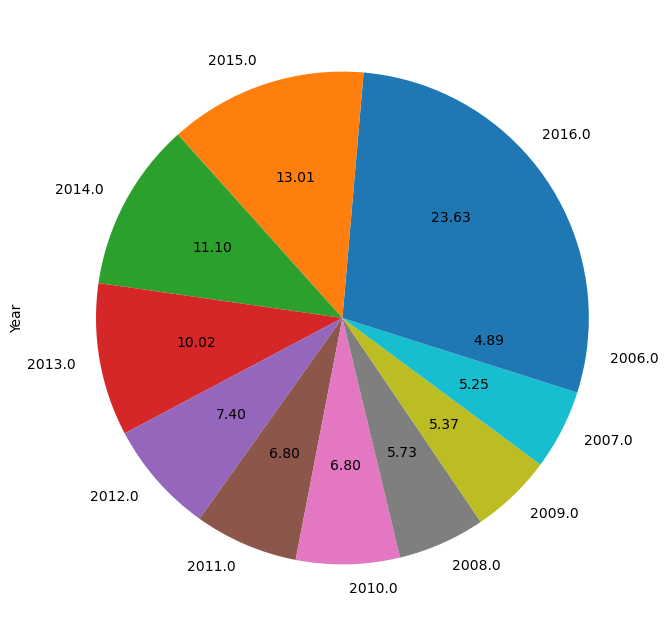

In [13]:
plt.figure(figsize=(15, 8))
data['Year'].value_counts().plot(kind='pie',autopct='%.2f')

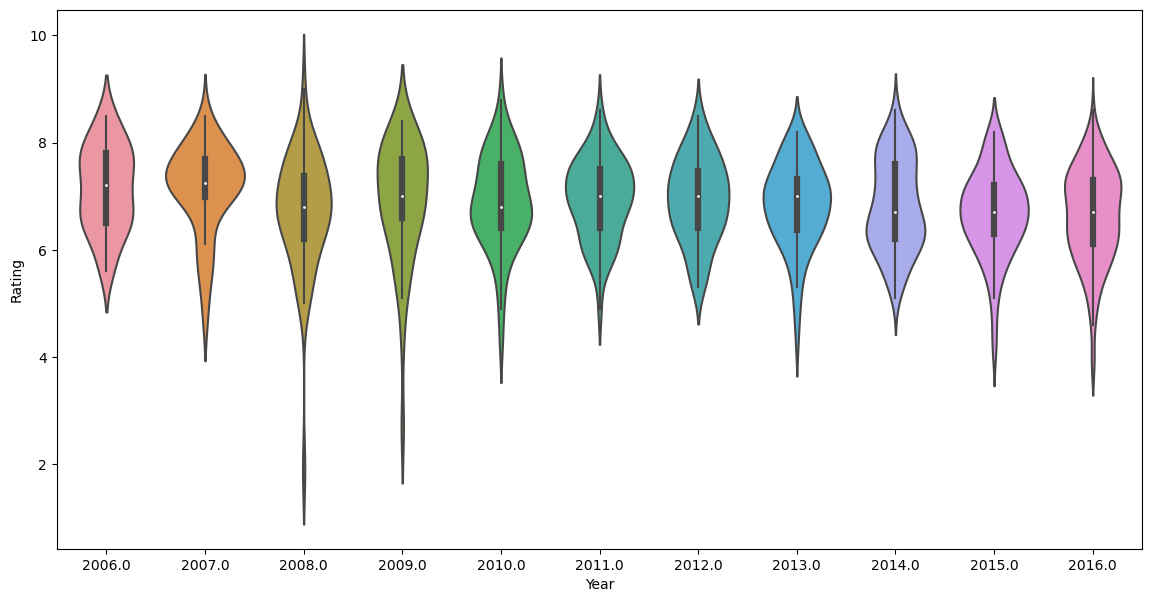

In [14]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Year', y = 'Rating', data = data)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

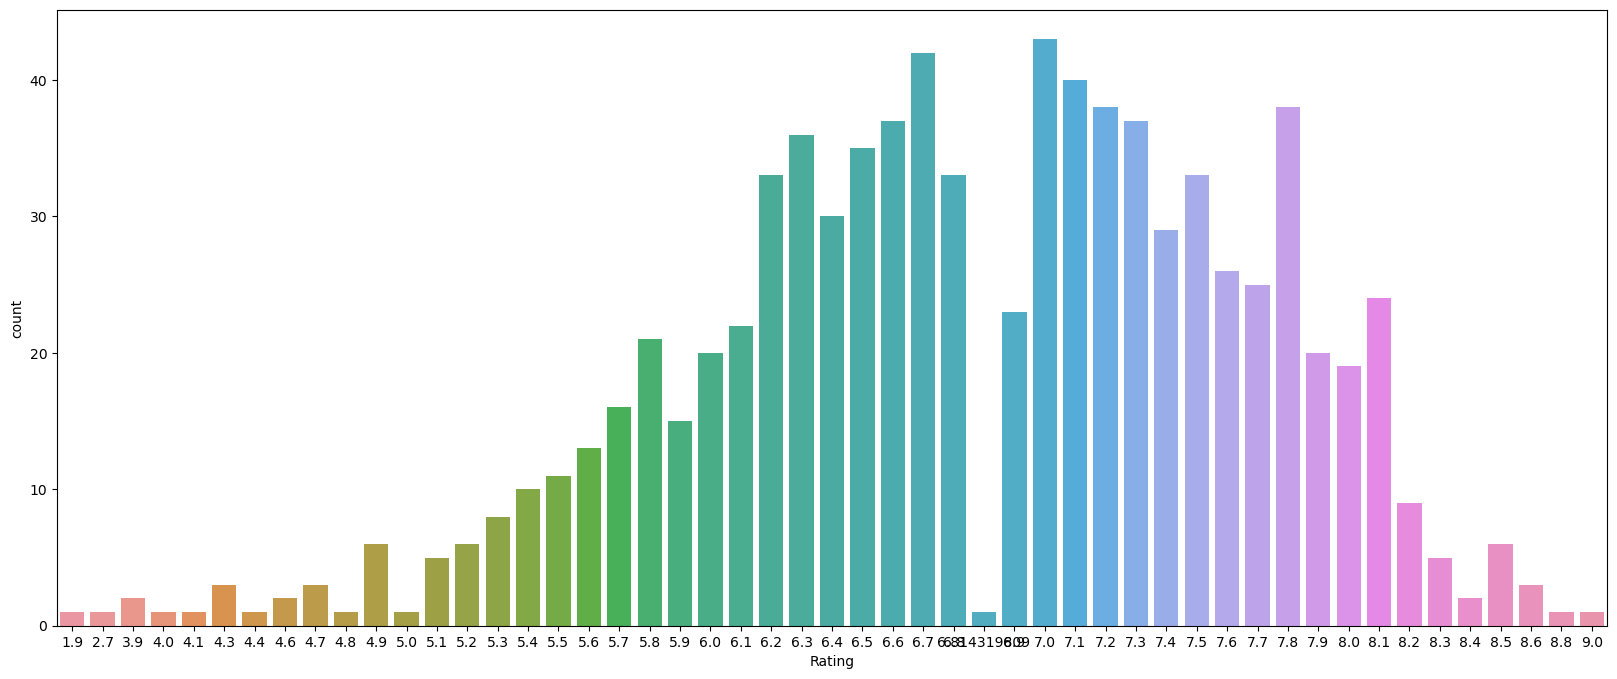

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(data['Rating'])

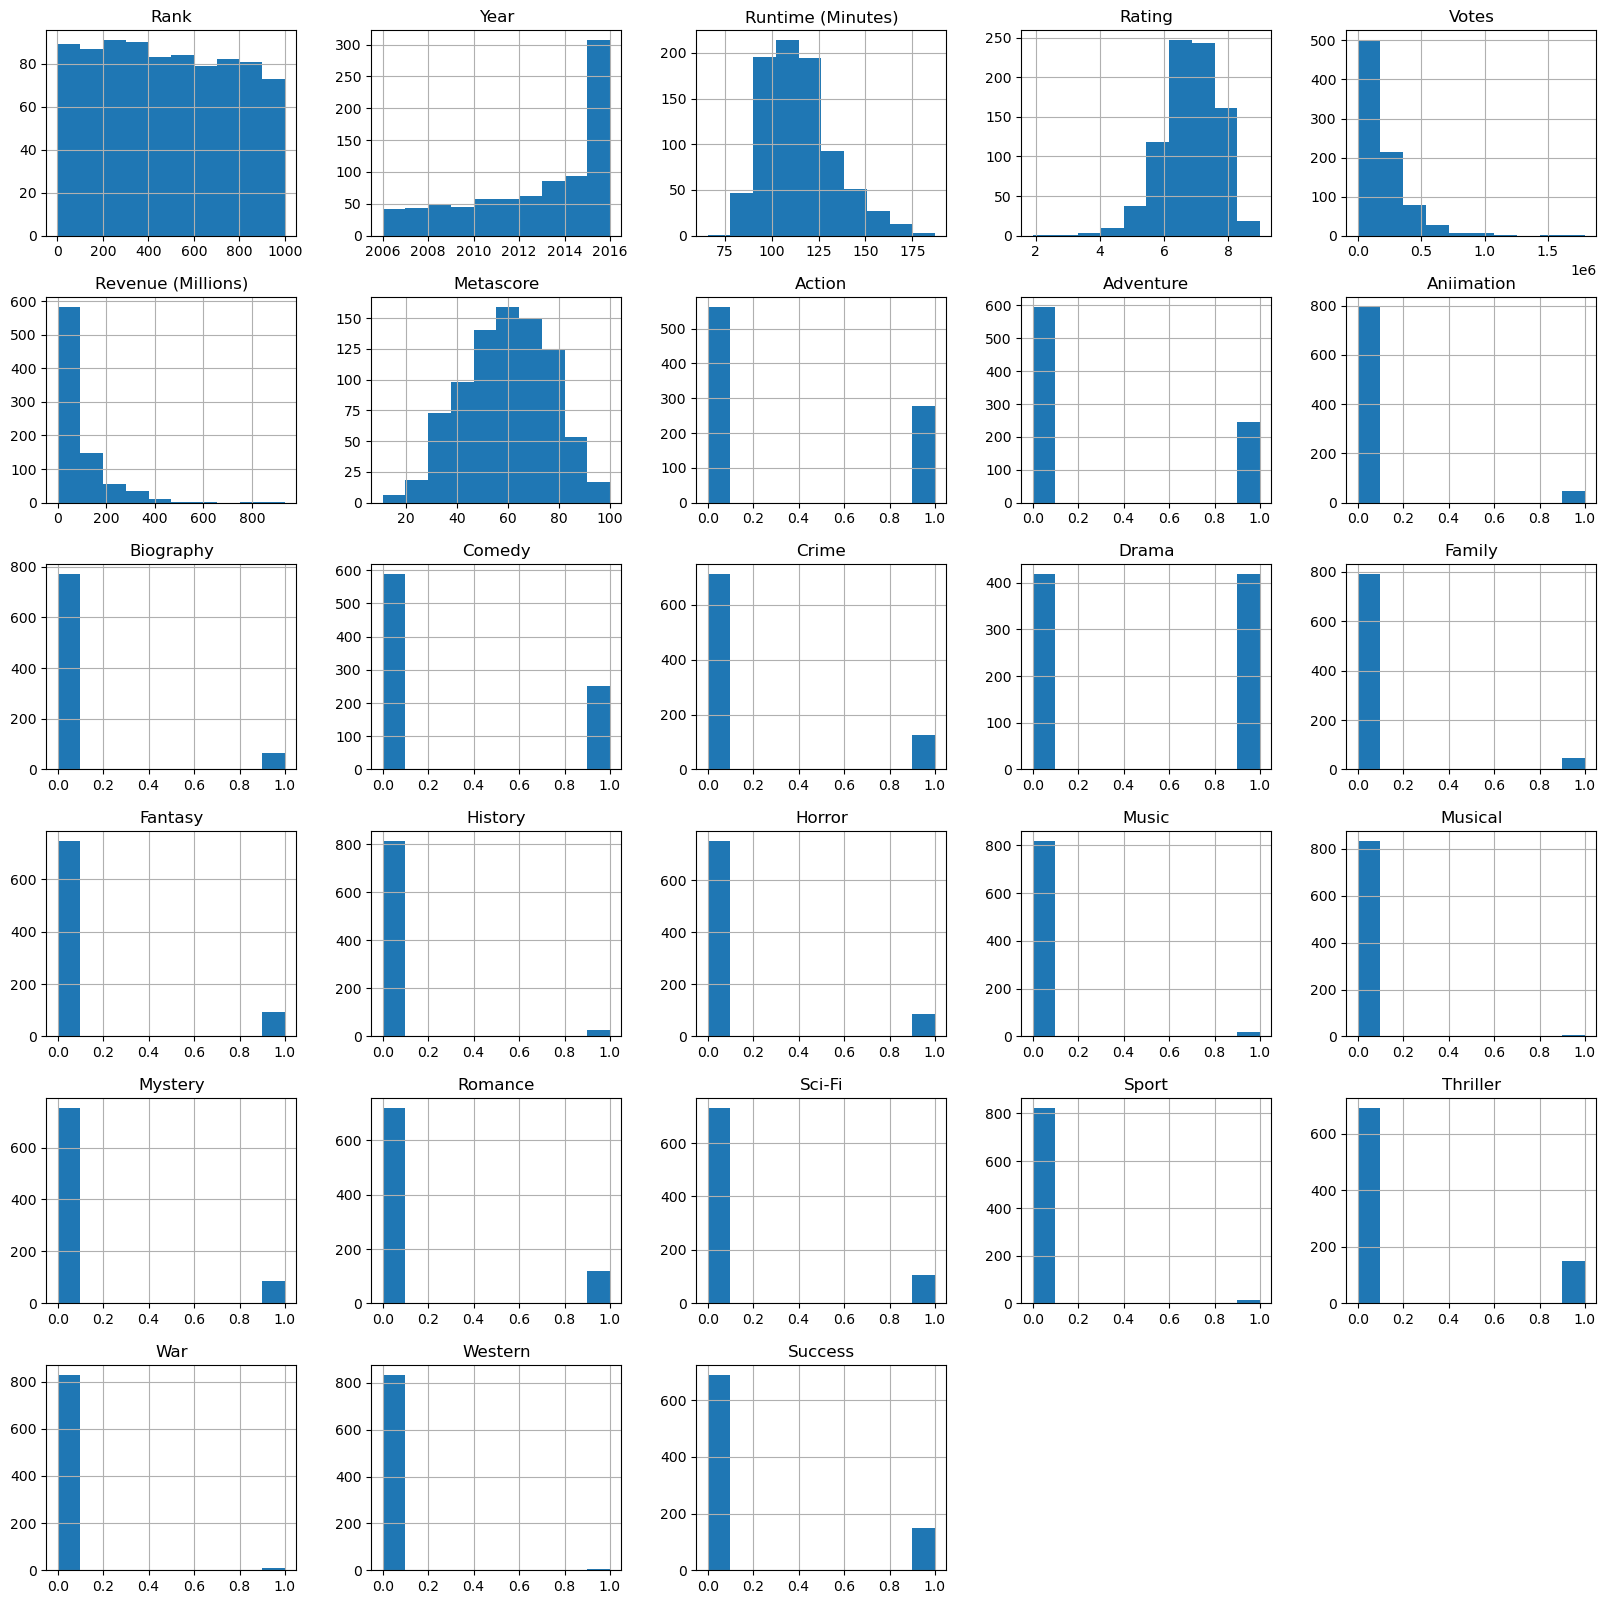

In [69]:
# Plotting the numerical variables in histograms to see their distribution.
data.hist(figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='Year'>

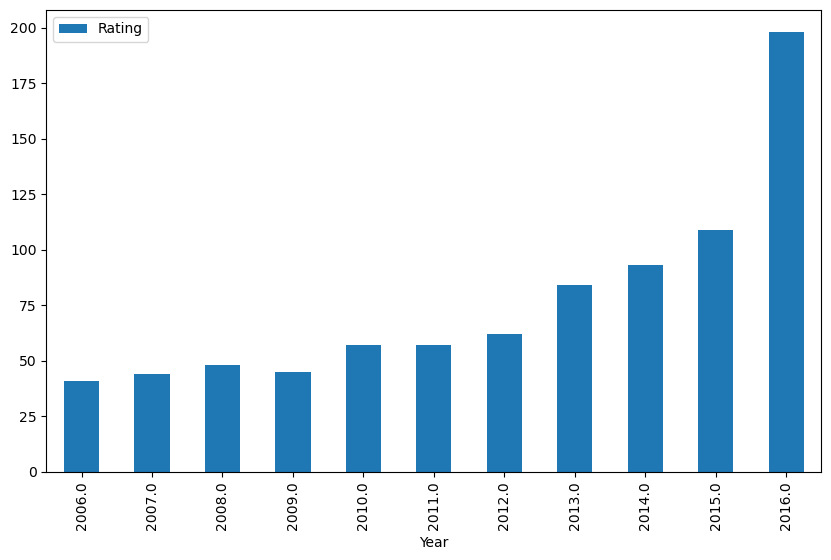

In [16]:
data.groupby(['Year']).count()[['Rating']].plot(kind='bar',figsize=(10,6))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Votes', ylabel='Revenue (Millions)'>

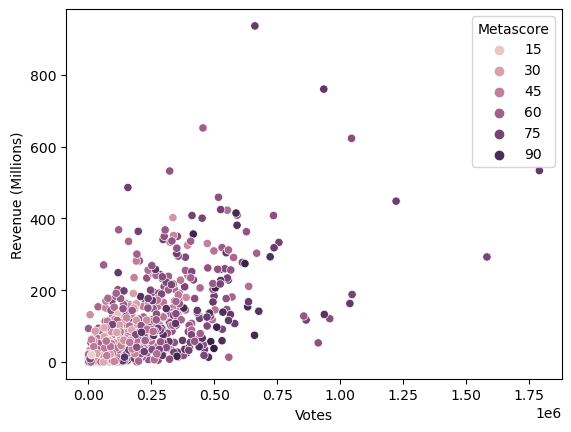

In [17]:
sns.scatterplot(data['Votes'],data['Revenue (Millions)'],data['Metascore'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Rating'>

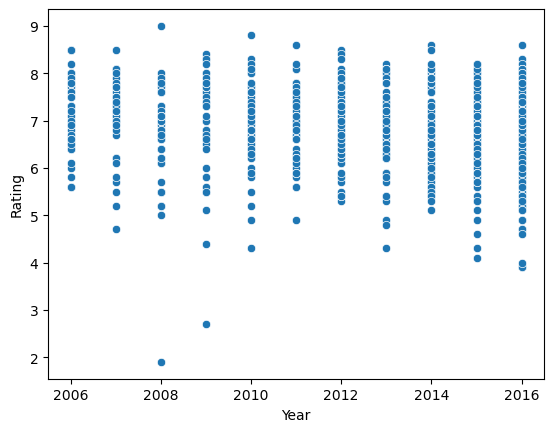

In [18]:
sns.scatterplot(data['Year'],data['Rating'])

<AxesSubplot:>

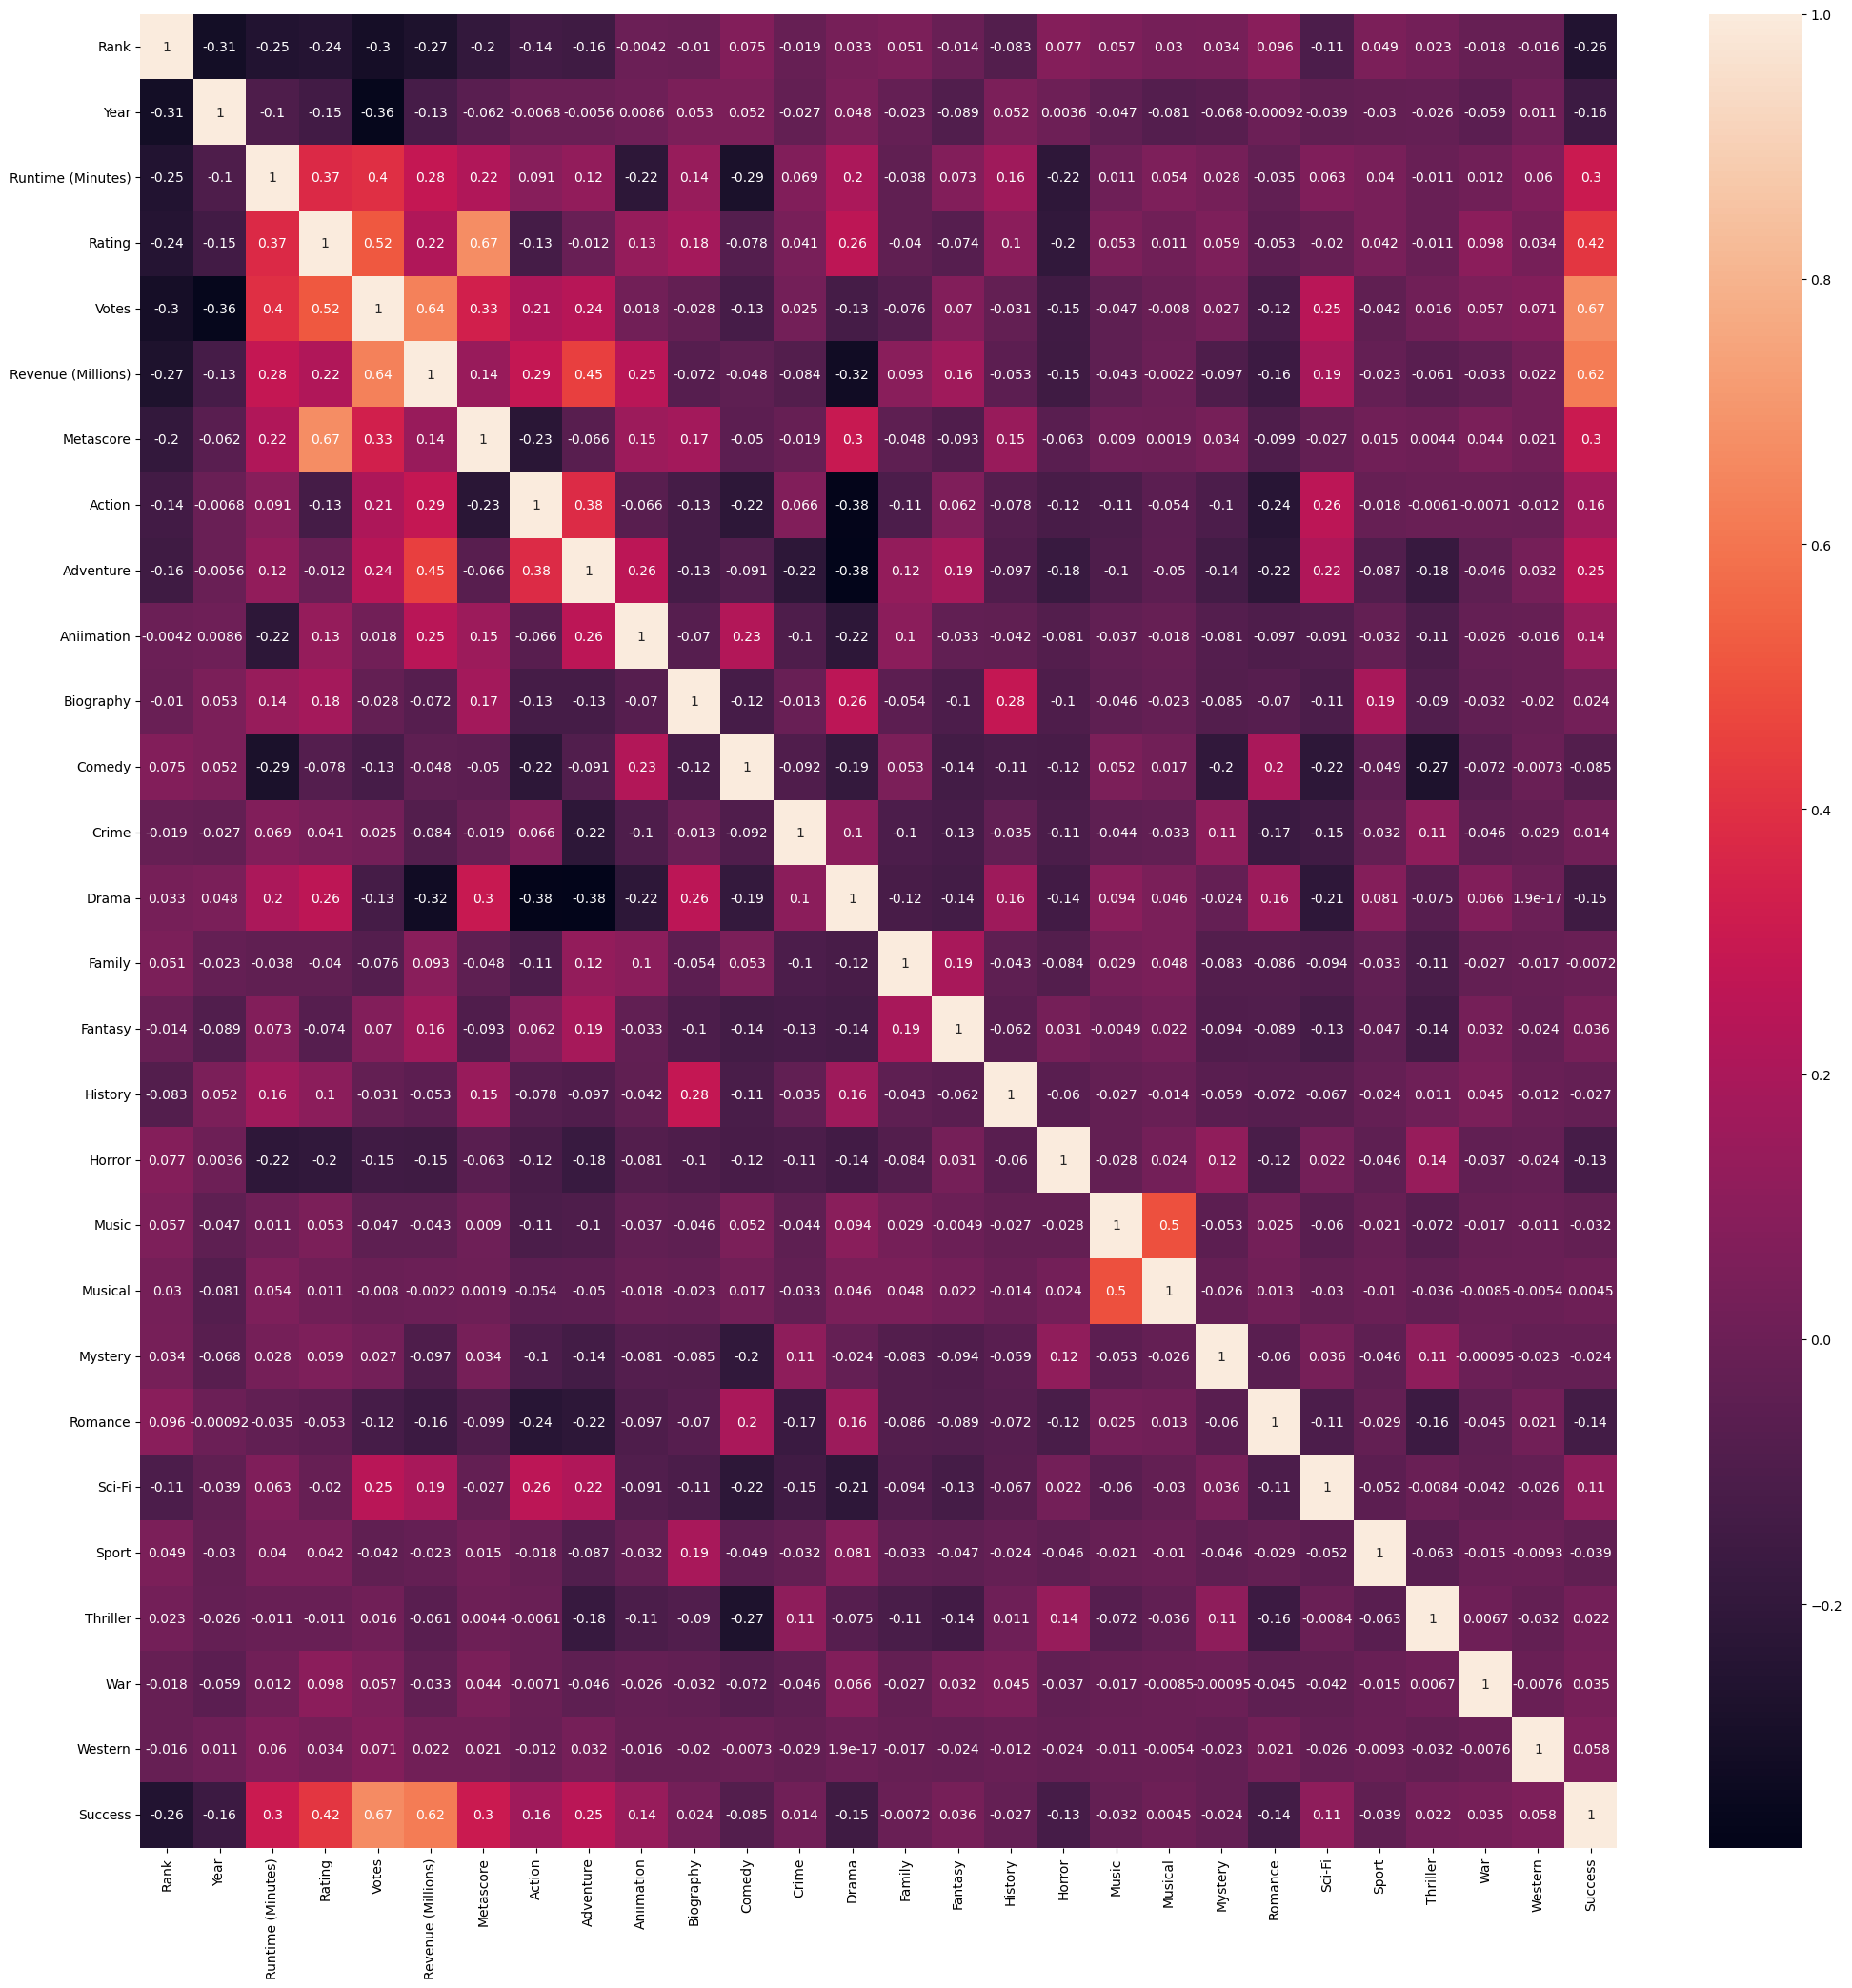

In [19]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(25,25)) 
sns.heatmap(corrmat,annot=True, cmap=None)

## Logistic Regression

In [45]:
data = data.fillna(data.median())

C:\Users\HP\AppData\Local\Temp\ipykernel_1180\1553445849.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [46]:
x = data[['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
y = data['Success']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,stratify=y)

In [48]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=227)

In [50]:
x_train.head()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
232,2014.0,119.0,7.8,440299.0,42.34,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
671,2016.0,92.0,4.6,11555.0,3.77,22.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,2006.0,102.0,7.2,171356.0,70.27,63.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23,2016.0,100.0,6.2,66540.0,113.08,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485,2013.0,91.0,6.5,133113.0,54.24,57.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y_train.head()

232    0.0
671    0.0
704    0.0
23     0.0
485    0.0
Name: Success, dtype: float64

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Now you can use y_train_encoded for logistic regression
lr_clf = LogisticRegression(random_state=227)
lr_clf.fit(x_train, y_train_encoded)

LogisticRegression(random_state=227)

In [53]:
y_test_pred_lr = lr_clf.predict(x_test)

In [54]:
x = data[['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
y = data['Success']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=227)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

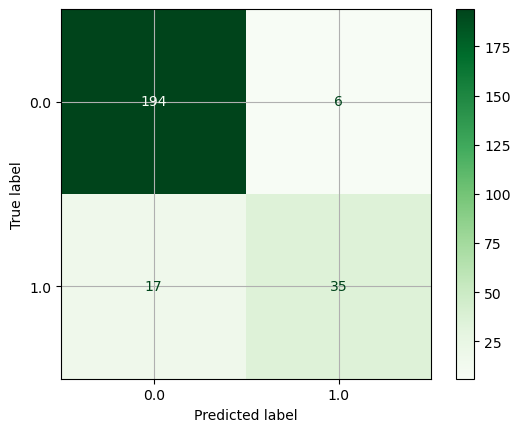

In [55]:
plot_confusion_matrix(lr_clf,x_test,y_test,cmap='Greens')
plt.grid(True)
plt

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

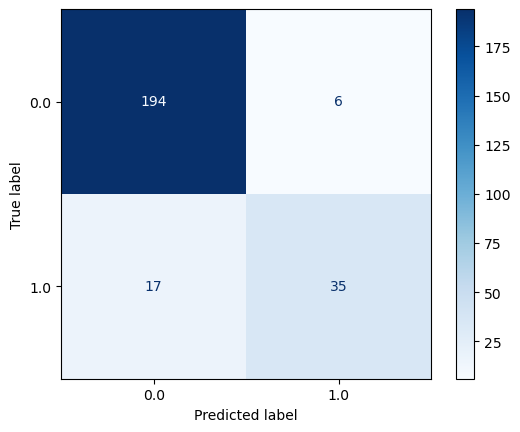

In [56]:
plot_confusion_matrix(lr_clf,x_test,y_test,cmap='Blues')
plt.grid(False)
plt

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       200
         1.0       0.85      0.67      0.75        52

    accuracy                           0.91       252
   macro avg       0.89      0.82      0.85       252
weighted avg       0.91      0.91      0.90       252



## Random Forest Classifier

In [58]:
rf_clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=1,random_state=227)
rf_clf.fit(x_train, y_train)
rf_clf.oob_score_

0.9829642248722317

In [59]:
for w in range(100,1000,50):
    rf_clf_gs=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=227)
    rf_clf_gs.fit(x_train, y_train)
    oob=rf_clf_gs.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 100
OOB score is 0.9863713798977853
************************
For n_estimators = 150
OOB score is 0.9880749574105622
************************
For n_estimators = 200
OOB score is 0.989778534923339
************************
For n_estimators = 250
OOB score is 0.9880749574105622
************************
For n_estimators = 300
OOB score is 0.9880749574105622
************************
For n_estimators = 350
OOB score is 0.9880749574105622
************************
For n_estimators = 400
OOB score is 0.9880749574105622
************************
For n_estimators = 450
OOB score is 0.9880749574105622
************************
For n_estimators = 500
OOB score is 0.9880749574105622
************************
For n_estimators = 550
OOB score is 0.9880749574105622
************************
For n_estimators = 600
OOB score is 0.9880749574105622
************************
For n_estimators = 650
OOB score is 0.9880749574105622
************************
For n_estimators = 700
OOB score is 0.988

In [60]:
for w in range(300,400,10):
    rf_clf_gs=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=227)
    rf_clf_gs.fit(x_train, y_train)
    oob=rf_clf_gs.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 300
OOB score is 0.9880749574105622
************************
For n_estimators = 310
OOB score is 0.9880749574105622
************************
For n_estimators = 320
OOB score is 0.9880749574105622
************************
For n_estimators = 330
OOB score is 0.9880749574105622
************************
For n_estimators = 340
OOB score is 0.9880749574105622
************************
For n_estimators = 350
OOB score is 0.9880749574105622
************************
For n_estimators = 360
OOB score is 0.9880749574105622
************************
For n_estimators = 370
OOB score is 0.9880749574105622
************************
For n_estimators = 380
OOB score is 0.9880749574105622
************************
For n_estimators = 390
OOB score is 0.9880749574105622
************************


In [61]:
rf_clf_best=RandomForestClassifier(n_estimators=360,oob_score=True,n_jobs=-1,random_state=227)
rf_clf_best.fit(x_train, y_train)
y_test_pred_rf = rf_clf_best.predict(x_test)
rf_clf_best.oob_score_

0.9880749574105622

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

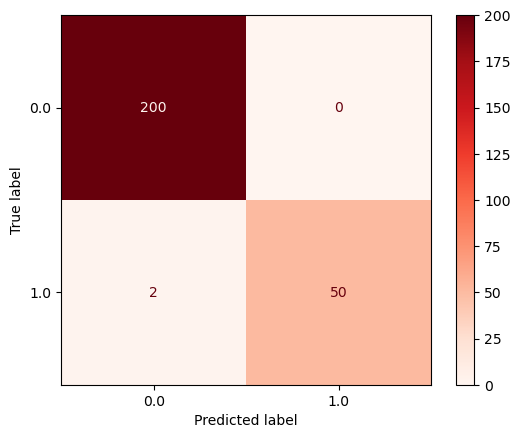

In [62]:
plot_confusion_matrix(rf_clf_best,x_test,y_test,cmap='Reds')
plt.grid(False)
plt

In [63]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       200
         1.0       1.00      0.96      0.98        52

    accuracy                           0.99       252
   macro avg       1.00      0.98      0.99       252
weighted avg       0.99      0.99      0.99       252



## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.9761904761904762

In [65]:
tree.score(x_train,y_train)

1.0

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

clf = confusion_matrix(y_test, tree.predict(x_test))

In [67]:
clf

array([[197,   3],
       [  3,  49]], dtype=int64)

<AxesSubplot:>

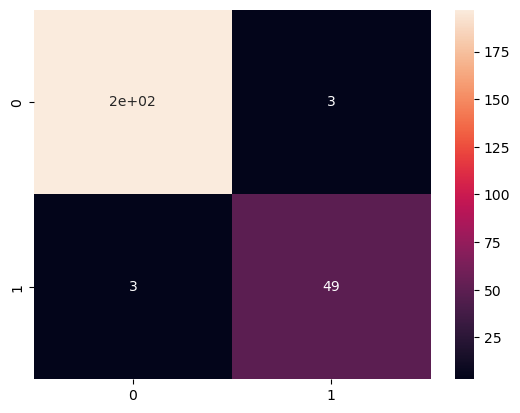

In [68]:
sns.heatmap(clf,annot=True)